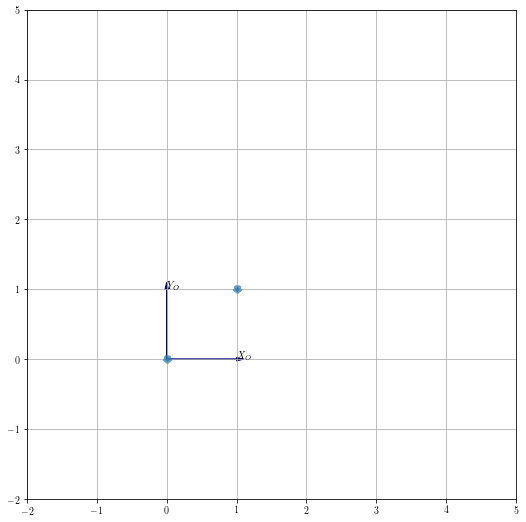

In [1]:
%matplotlib inline  
import sympy
from frames import Frame, TransformationTree, round_expr
sympy.init_printing()
    
tt = TransformationTree()
ax, frames = tt.plot_frames()
p = tt.plotInFrame([1,1,0,1], ax, 0, "*")


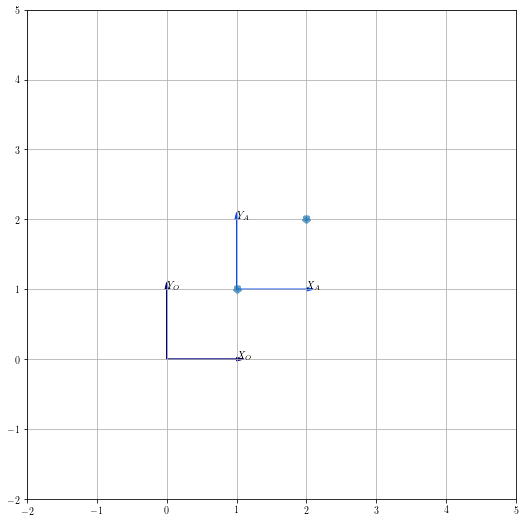

In [2]:
tt = TransformationTree()
A = Frame("A", transf="transl(1,1,0)", parent=tt.root)
ax, frames = tt.plot_frames()
p = tt.plotInFrame([1,1,0,1], ax, 1, "*")

Point w.r.t. origin frame:


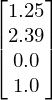

Transformation:


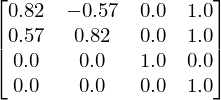

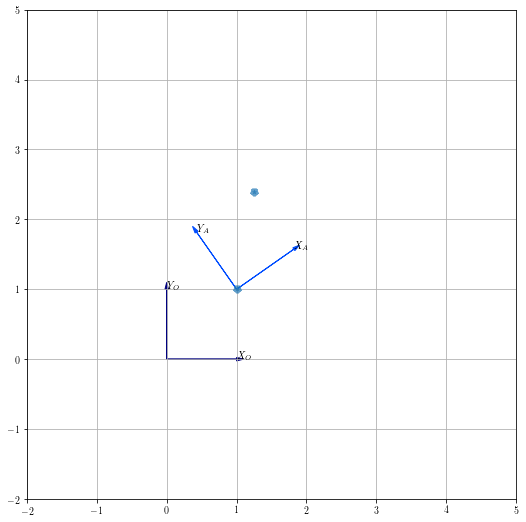

In [3]:
tt = TransformationTree()
A = Frame("A", transf="transl(1,1,0)*rotz(35)", parent=tt.root)
ax, frames = tt.plot_frames()
p = tt.plotInFrame([1,1,0,1], ax, 1, "*")
print "Point w.r.t. origin frame:"
display(round_expr(p[1]))
print "Transformation:"
display(round_expr(A.T))

O(identity())
└── A(rotz(45))


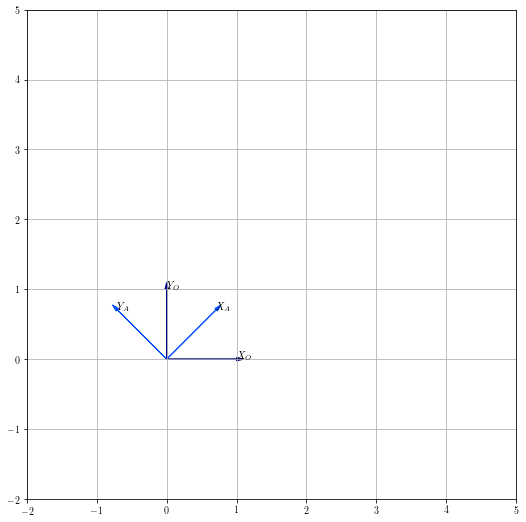

In [4]:
tt = TransformationTree()
A = Frame("A", transf="rotz(45)", parent=tt.root)

print tt

ax, frames = tt.plot_frames()

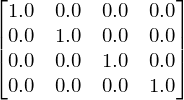

In [5]:
display(round_expr(tt.root.T))

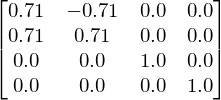

In [6]:
display(round_expr(A.T))

O(identity())
└── A(rotz(45))
    └── A(transl(0,1,0))


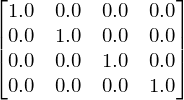

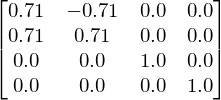

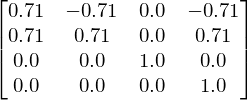

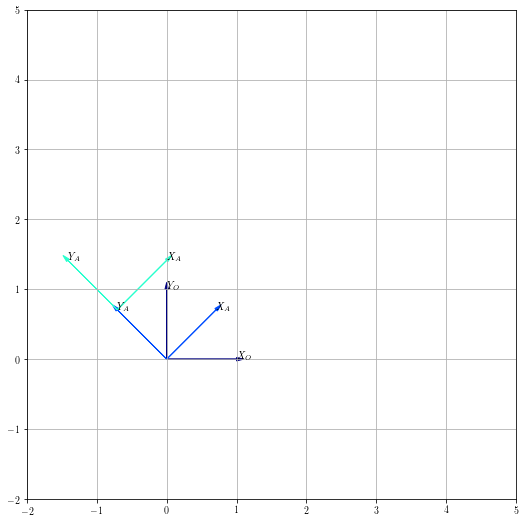

In [7]:
tt = TransformationTree()
A = Frame("A", transf="rotz(45)", parent=tt.root)
B = Frame("A", transf="transl(0,1,0)", parent=A)

print tt

ax, frames = tt.plot_frames()

display(round_expr(tt.Hs[0]))
display(round_expr(tt.Hs[1]))
display(round_expr(tt.Hs[2]))

Matrix multiplication do not commute!

O(identity())
└── A1(rotz(45))
    └── B1(transl(2,1,0))
O(identity())
└── B2(transl(2,1,0))
    └── A2(rotz(45))


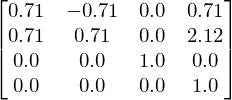

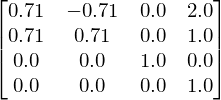

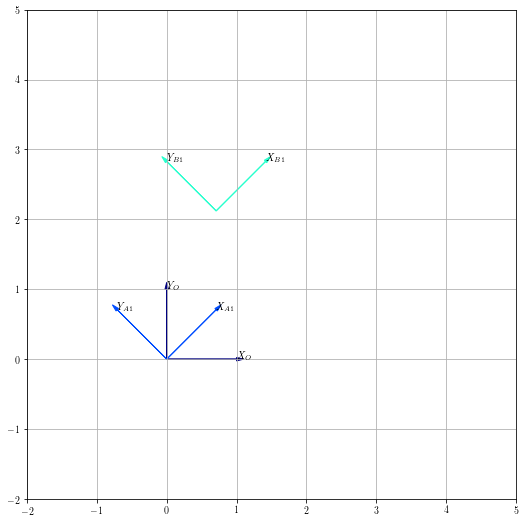

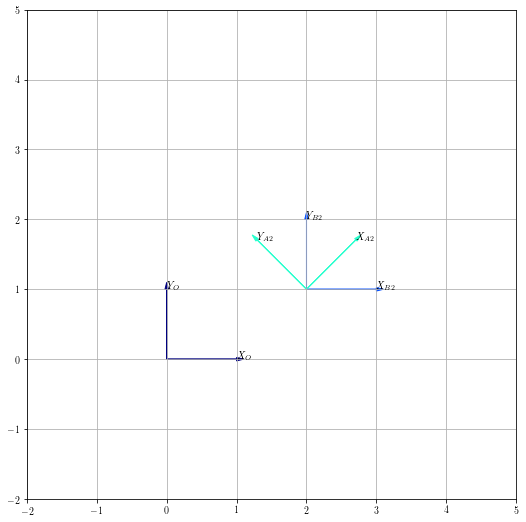

In [8]:
tt1 = TransformationTree()
A1 = Frame("A1", transf="rotz(45)", parent=tt1.root)
B1 = Frame("B1", transf="transl(2,1,0)", parent=A1)

tt2 = TransformationTree()
B2 = Frame("B2", transf="transl(2,1,0)", parent=tt2.root)
A2 = Frame("A2", transf="rotz(45)", parent=B2)

print tt1
print tt2

ax, frames = tt1.plot_frames()
display(round_expr(tt1.Hs[2]))

ax, frames = tt2.plot_frames()
display(round_expr(tt2.Hs[2]))


We can now use what we have learnt so far to describe a robot arm

O(identity())
└── l0(transl(.0,.0,0.0)*rotz(25.0)*transl(1.0,.0,.0)*rotx(0.0))
    └── l1(transl(.0,.0,0.0)*rotz(20.0)*transl(2.0,.0,.0)*rotx(0.0))
        └── l2(transl(.0,.0,0.0)*rotz(30.0)*transl(3.0,.0,.0)*rotx(0.0))


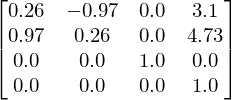

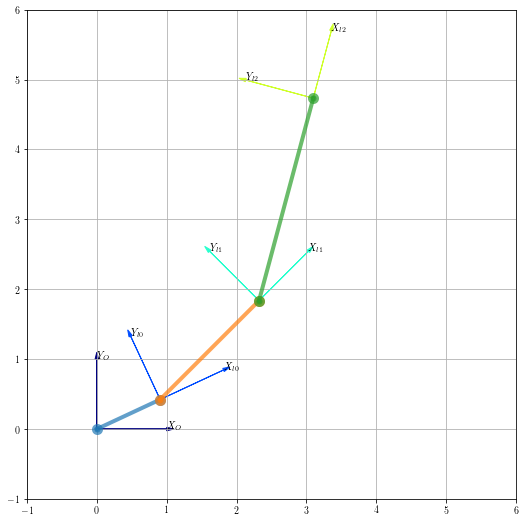

In [10]:
from links import MultiLink

l1 = 1.0; a1 = 25.0
l2 = 2.0; a2 = 20.0
l3 = 3.0; a3 = 30.0
arm = MultiLink()
_dh1 = (.0,a1,l1,.0)
_dh2 = (.0,a2,l2,.0)
_dh3 = (.0,a3,l3,.0)    
link1 = arm.addLink(_dh1)
link2 = arm.addLink(_dh2)
link3 = arm.addLink(_dh3)
print arm.tt

arm.plotLinks()

round_expr(arm.tt.Hs[-1])

l0(transl(.0,.0,0.0)*rotz(25.0)*transl(1.0,.0,.0)*rotx(0.0))
l1(transl(.0,.0,0.0)*rotz(20.0)*transl(2.0,.0,.0)*rotx(0.0))
l2(transl(.0,.0,0.0)*rotz(30.0)*transl(3.0,.0,.0)*rotx(0.0))
O(identity())
└── l0(transl(.0,.0,0.0)*rotz(25.0)*transl(1.0,.0,.0)*rotx(0.0))
    └── l1(transl(.0,.0,0.0)*rotz(20.0)*transl(2.0,.0,.0)*rotx(0.0))
        └── l2(transl(.0,.0,0.0)*rotz(30.0)*transl(3.0,.0,.0)*rotx(0.0))


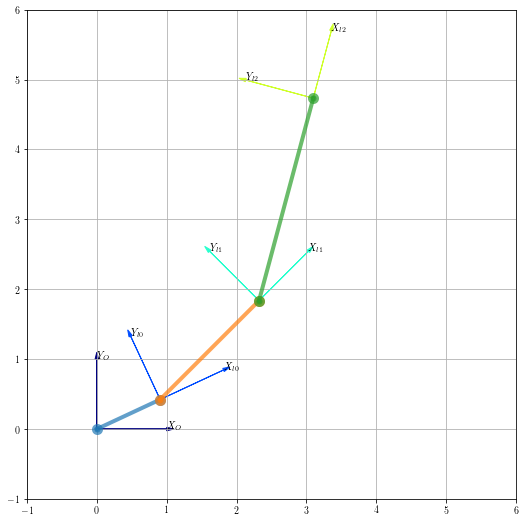

In [12]:
arm3 = MultiLink()
_dh = {"d":[.0,.0,.0],
      "theta":[a1,a2,a3],
      "r":[l1,l2,l3],
      "alpha":[.0,.0,.0]}

arm3.fromDH(_dh)
print arm3.tt
  
arm3.compose()
arm3.compose()

arm3.plotLinks()

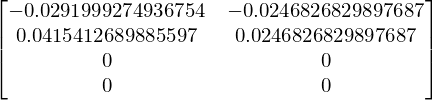

In [13]:
import frames
import sympy as sp
arm2 = MultiLink()
_dh1 = (.0,"s:alpha","s:L1",.0)
_dh2 = (.0,"s:beta","s:L2",.0)
a2l1 = arm2.addLink(_dh1)
a2l2 = arm2.addLink(_dh2)
arm2.compose("alpha","beta")

#print arm2.tt
#print arm2.H_eff 
Js = arm2.J.copy().subs({
      frames.SYMB("alpha"):15.0, 
      frames.SYMB("beta"):30, 
      frames.SYMB("L1"):1.0, 
      frames.SYMB("L2"):1.0})
#print arm2.J
display(Js.evalf())

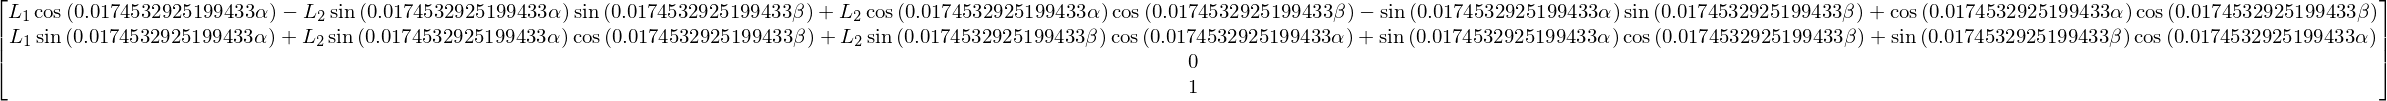

In [14]:
arm2.H_eff

In [ ]:
N = Ji.H * (Ji * Ji.H) ** -1

In [ ]:
Ji.rank()